In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
%matplotlib inline

In [55]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/9_ML_Practicals/Datasets/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [56]:
df.shape

(24, 6)

In [57]:
df = df.drop(columns=["Unnamed: 0","year","month"],axis=1)

In [58]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [59]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


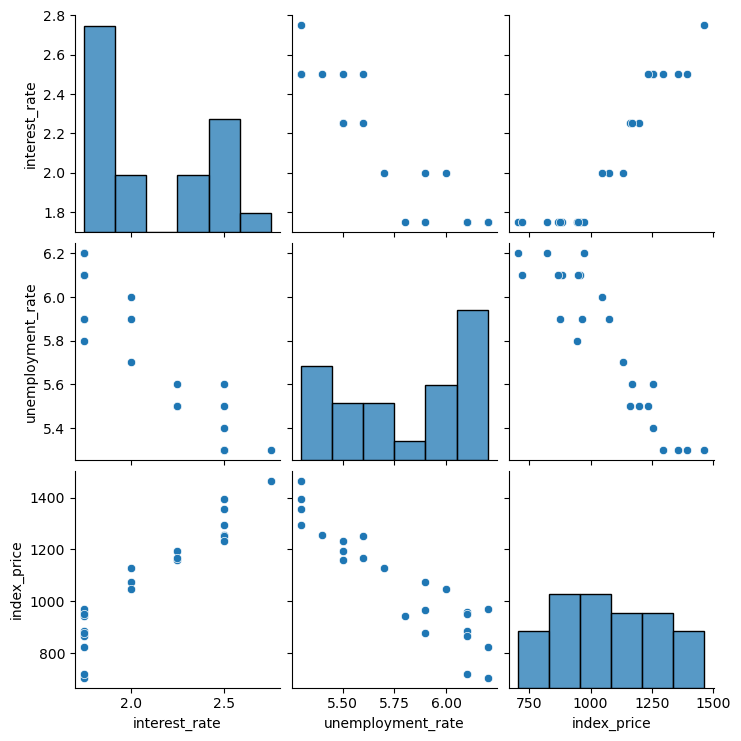

In [60]:
sns.pairplot(df)

In [61]:
# +1 : perfect positive corr --> increase of temp can increase ice cream sales
# 0.7-0.9 : strong positive corr ---> more study hr better score in exam (not always)
# 0.1-0.4 : weak positive corr --> People who exercise may be happier, but other factors (like sleep, diet) also play a role
# 0 : no correlation
# -0.1,-0.4 : weak negative corr --> people spending more time on social media less productive(not always)
# -0.7,-0.9 : strong negative corr --> faser drive less time to reach
# -1 : perfect negative corr --> more no of workers less time to complete task
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [62]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [63]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [64]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
X_train.shape,y_train.shape

((18, 2), (18,))

In [67]:
X_test.shape,y_test.shape

((6, 2), (6,))

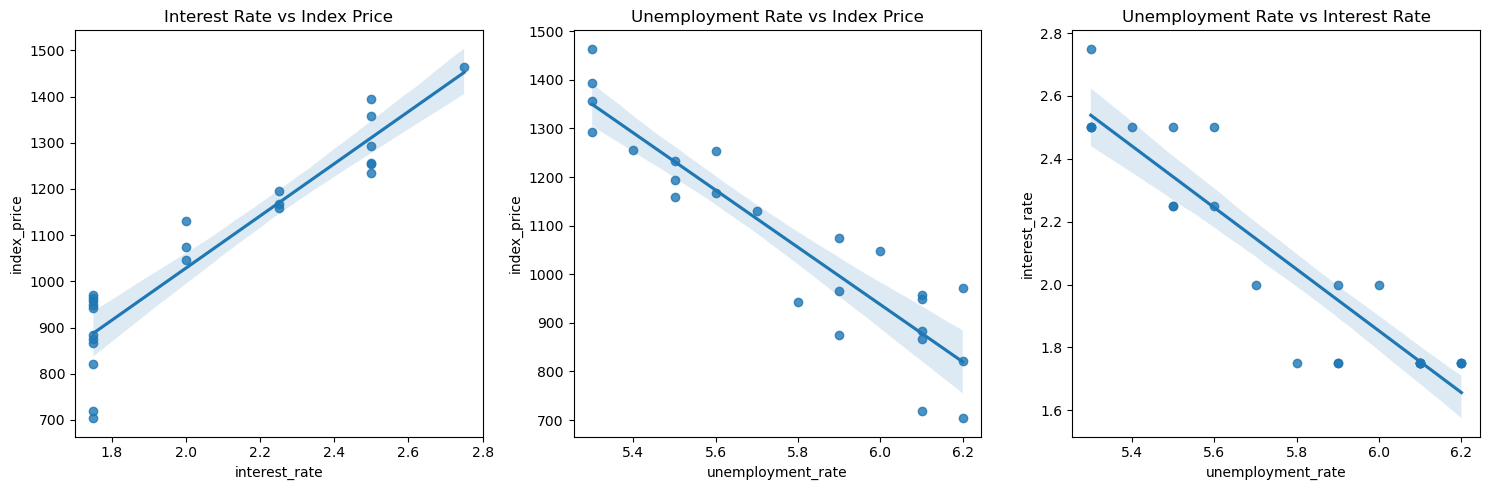

In [68]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=df['interest_rate'], y=df['index_price'])
plt.title('Interest Rate vs Index Price')
plt.subplot(1, 3, 2)
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])
plt.title('Unemployment Rate vs Index Price')
plt.subplot(1, 3, 3)
sns.regplot(x=df['unemployment_rate'], y=df['interest_rate'])
plt.title('Unemployment Rate vs Interest Rate')
plt.tight_layout() 
plt.show()

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
model.coef_,model.intercept_

(array([  88.27275507, -116.25716066]), 1053.4444444444443)

In [73]:
# cross validation
validation_score = cross_val_score(model,X_train,y_train,cv=3,scoring='r2')

In [74]:
validation_score

array([0.88856676, 0.82159918, 0.85226213])

In [75]:
np.mean(validation_score)

0.8541426890278224

In [76]:
y_pred = model.predict(X_test)

In [78]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
print("mse:",mse)
print("mae",mae)
print("rmse:",rmse)
print("r2:",r2_score)

mse: 5793.76288771258
mae 59.93578152323554
rmse: 76.11677139574813
r2: 0.8278978091457142


##### Assumptions

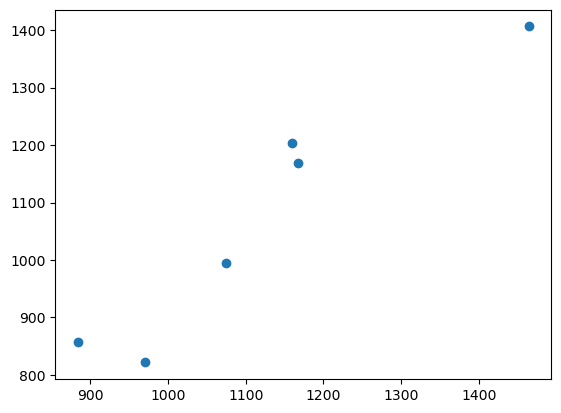

In [80]:
# linear realtionship between y_test and y_pred
plt.scatter(y_test,y_pred)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='index_price', ylabel='Density'>

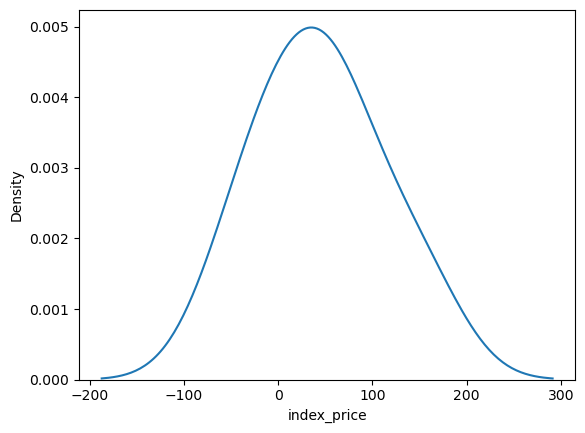

In [83]:
# residuals are normally distributed
residuals = y_test-y_pred
sns.kdeplot(residuals) 

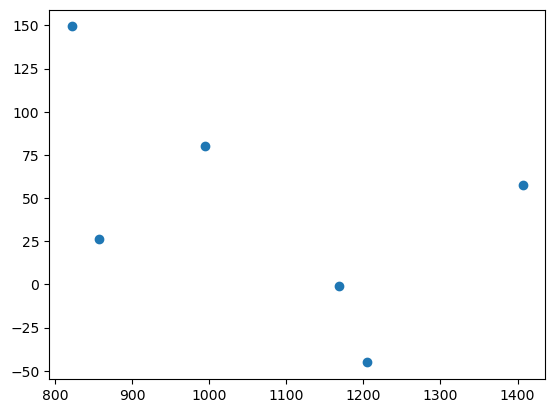

In [84]:
plt.scatter(y_pred,residuals)

In [89]:
# ols 
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                       0.754
Time:                        21:21:47   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
